#### Referências:
* https://ieeexplore.ieee.org/document/11029450

<p>
@ARTICLE{11029450,
  author={Ribeiro, Jean A. and Carmo, Diedre S. Do and Reis, Fabiano and Magalhães, Ricardo S. and Dertkigil, Sergio S. J. and Appenzeller, Simone and Rittner, Leticia},
  journal={IEEE Data Descriptions}, 
  title={Descriptor: Manually Annotated CT Dataset of Lung Lobes in COVID-19 and Cancer Patients (LOCCA)}, 
  year={2025},
  volume={2},
  number={},
  pages={239-246},
  keywords={Lungs;Computed tomography;Annotations;Lung cancer;Biomedical imaging;Lesions;Image segmentation;Manuals;COVID-19;Three-dimensional displays;Cancer;computed tomography (CT) images;COVID-19;dataset;manual annotation for lung lobes},
  doi={10.1109/IEEEDATA.2025.3577999}}
</p>

In [1]:
from pathlib import Path
import shutil

# Lembrar de montar o HD
DATASETS_DIR = Path('/media/duque/devstore')
LOCCA_DIR = DATASETS_DIR / 'locca'

### Informações básicas

In [2]:
print(LOCCA_DIR)
for path in sorted(LOCCA_DIR.iterdir()):
    print('\t|__'+path.name)

/media/duque/devstore/locca
	|__README.md
	|__annotations_HCU
	|__annotations_Task06-Lung
	|__images_HCU_FULL
	|__images_TASK06_FULL
	|__original
	|__parts
	|__pngs
	|__pngs_preprocessed
	|__scripts


Necessário coletar o restante dos dados (que são os 30 volumes da Task06 do MSD):


https://drive.google.com/drive/folders/1HqEgzS8BV2c7xYNrZdEAnrHk7osJJ--2

Armazenei esses dados em 'LOCCA_DIR / original'

In [59]:
# TASK06_DIR = LOCCA_DIR / 'images_TASK06_FULL'
# TASK06_DIR.mkdir(exist_ok=True)


# original_paths = [path for path in (LOCCA_DIR / 'original/Task06_Lung').glob('*/lung*.nii.gz')]
# annotation_paths = [
#     path.name.split('.')[0].replace('_label', '')
#     for path in (LOCCA_DIR / 'annotations_Task06-Lung').glob('lung*')
# ]


# # Filtragem
# for path in sorted(original_paths):
#     if path.name.split('.')[0] in annotation_paths and \
#         path.parent.name != 'labelsTr':
        
#         shutil.copy(path, TASK06_DIR/f'images_TASK06/{path.name}')

In [3]:
HCU_DIR = LOCCA_DIR / 'images_HCU_FULL/images_HCU'
TASK06_DIR = LOCCA_DIR / 'images_TASK06_FULL/images_TASK06'

print(f'{len(list(HCU_DIR.iterdir()))} volumes do conjunto do HCU')
print(f'{len(list(TASK06_DIR.iterdir()))} volumes do conjunto da Task 06 do MSD')

30 volumes do conjunto do HCU
30 volumes do conjunto da Task 06 do MSD


### Leitura e Visualização

In [4]:
import sys
import numpy as np
from pathlib import Path
import random
import matplotlib.pyplot as plt

ROOT_DIR = Path.cwd().parent
sys.path.append(str(ROOT_DIR))

from src.utils.load_image_and_annotation import load_nifti, load_nrrd, visualize_slice  # noqa: E402, F401

In [5]:
volumes = sorted(LOCCA_DIR.glob('images*/*/*.nii.gz'), key=lambda p:p.name)
masks = sorted(LOCCA_DIR.glob('annotations*/*.nrrd'), key=lambda p:p.name)

In [4]:
sample_file = volumes[random.randint(0, 59)]
vol = load_nifti(sample_file)

print(f'vol type: {type(vol)}')
print(f'vol len: {len(vol)}')

vol


vol type: <class 'tuple'>
vol len: 2


(array([[[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         ...,
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.]],
 
        [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         ...,
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.]],
 
        [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
      

Existem dois arrays do objeto de um volume. A slice em si é o primeiro array e há apenas um canal de intensidades de valores.

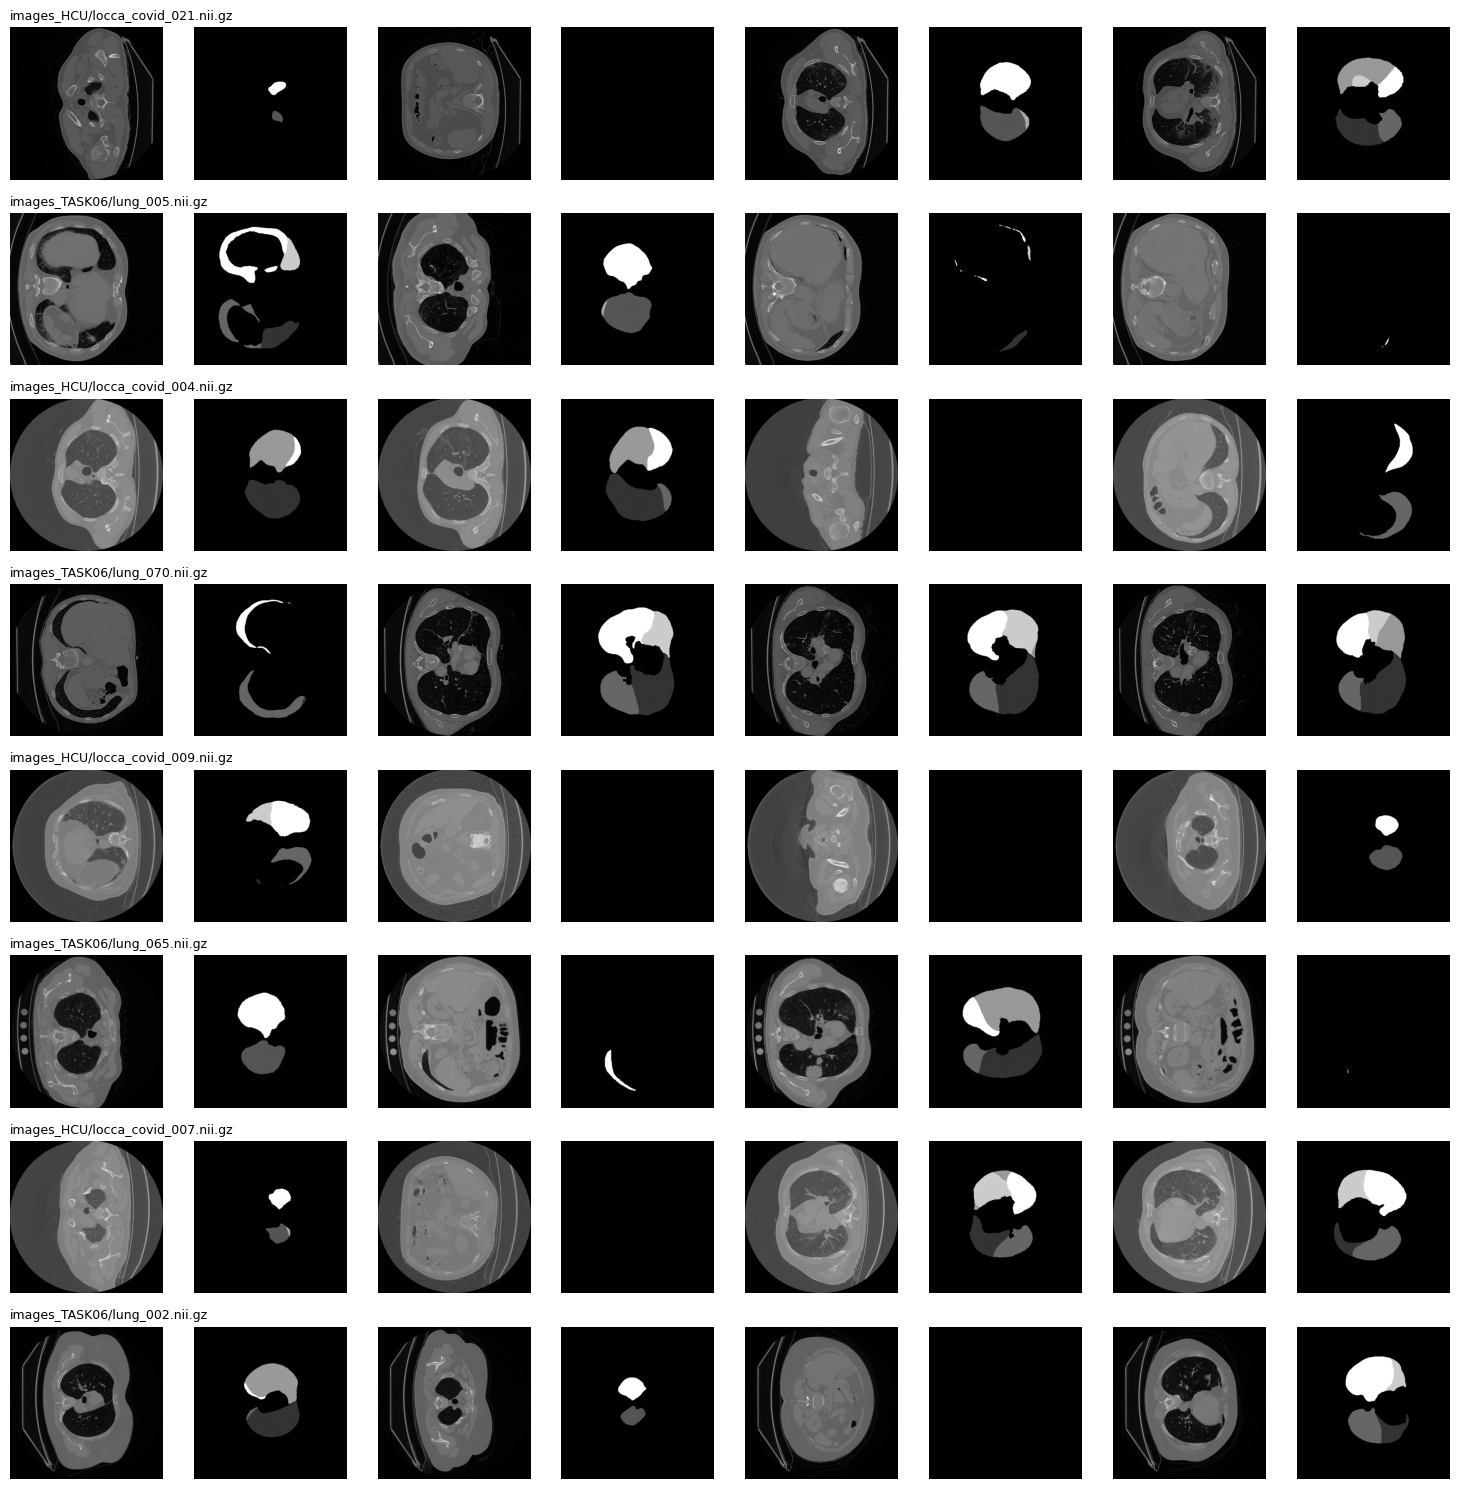

In [6]:
def visualize_batch(num_lins, volumes, masks):
    assert num_lins % 2 == 0
	
    fig, axs = plt.subplots(num_lins, num_lins, figsize=(15,15))

    for i, lin in enumerate(axs):
        file_idx = random.randint(0, 59)
        volume_path, mask_path = volumes[file_idx], masks[file_idx]

        volume, _ = load_nifti(volume_path)
        mask, _ = load_nrrd(mask_path)

        assert volume.shape == mask.shape

        # slice - mask | slice - mask | ...
        # ...
        for j in range(0, num_lins, 2):
            # exibir slice
            slice_idx = random.randint(0, volume.shape[-1]-1)
            slice = volume[:, :, slice_idx]

            lin[j].imshow(slice, cmap='gray')
            lin[j].axis('off')

            # exibir anotações
            slice_mask = mask[:, :, slice_idx]
            lin[j+1].imshow(slice_mask, cmap='gray')
            lin[j+1].axis('off')
        
        lin[0].set_title(volume_path.parent.name+'/'+volume_path.name, fontsize=9, loc='left')

    # if mask is not None:
    # 	plt.subplot(1, 2, 2)
    # 	plt.imshow(image[:, :, slice_index], cmap='gray')
    # 	plt.imshow(mask[:, :, slice_index], cmap='jet', alpha=0.5)
    # 	plt.title('Segmentation Mask')
    plt.tight_layout(w_pad=0.1)
    plt.show()

# title=sample_file.parent.name + '/' + sample_file.name
visualize_batch(8, volumes, masks)

É perceptível que a distribuição de intensidade é bastante variável, entre os dois conjuntos. Necessário uma espécie de equalização ou algum outro método de filtragem. Além disso, há a possibilidade de usar janelas de valores de Hounsfield Units.

Há determinadas máscaras onde os nódulos estão recortados. Filtrar pelos metadados as slices? Como lidar com máscaras com lacunas de lesões pulmonares?

Resposta: ...

In [7]:
def vols_generator(volumes, masks):
    for vol_path, mask_path in zip(volumes, masks):
        yield load_nifti(vol_path)[0], load_nrrd(mask_path)[0], vol_path

In [8]:
generator = vols_generator(volumes, masks)

In [9]:
shapes = []

for vol, mask, path in generator:
    print(vol.shape, '\t', path.name)
    shapes.append(vol.shape)

(512, 512, 394) 	 locca_covid_001.nii.gz
(512, 512, 438) 	 locca_covid_002.nii.gz
(512, 512, 456) 	 locca_covid_003.nii.gz
(512, 512, 436) 	 locca_covid_004.nii.gz
(512, 512, 961) 	 locca_covid_005.nii.gz
(512, 512, 317) 	 locca_covid_006.nii.gz
(512, 512, 396) 	 locca_covid_007.nii.gz
(512, 512, 311) 	 locca_covid_008.nii.gz
(512, 512, 441) 	 locca_covid_009.nii.gz
(512, 512, 398) 	 locca_covid_010.nii.gz
(512, 512, 503) 	 locca_covid_011.nii.gz
(512, 512, 373) 	 locca_covid_012.nii.gz
(512, 512, 403) 	 locca_covid_013.nii.gz
(512, 512, 1126) 	 locca_covid_014.nii.gz
(512, 512, 448) 	 locca_covid_015.nii.gz
(512, 512, 413) 	 locca_covid_016.nii.gz
(512, 512, 438) 	 locca_covid_017.nii.gz
(512, 512, 373) 	 locca_covid_018.nii.gz
(512, 512, 402) 	 locca_covid_019.nii.gz
(512, 512, 333) 	 locca_covid_020.nii.gz
(512, 512, 339) 	 locca_covid_021.nii.gz
(512, 512, 401) 	 locca_covid_022.nii.gz
(512, 512, 338) 	 locca_covid_023.nii.gz
(512, 512, 313) 	 locca_covid_024.nii.gz
(512, 512, 406)

In [ ]:
shapes_np = np.array([shapes])

In [4]:
shapes_np.min()

np.int64(128)

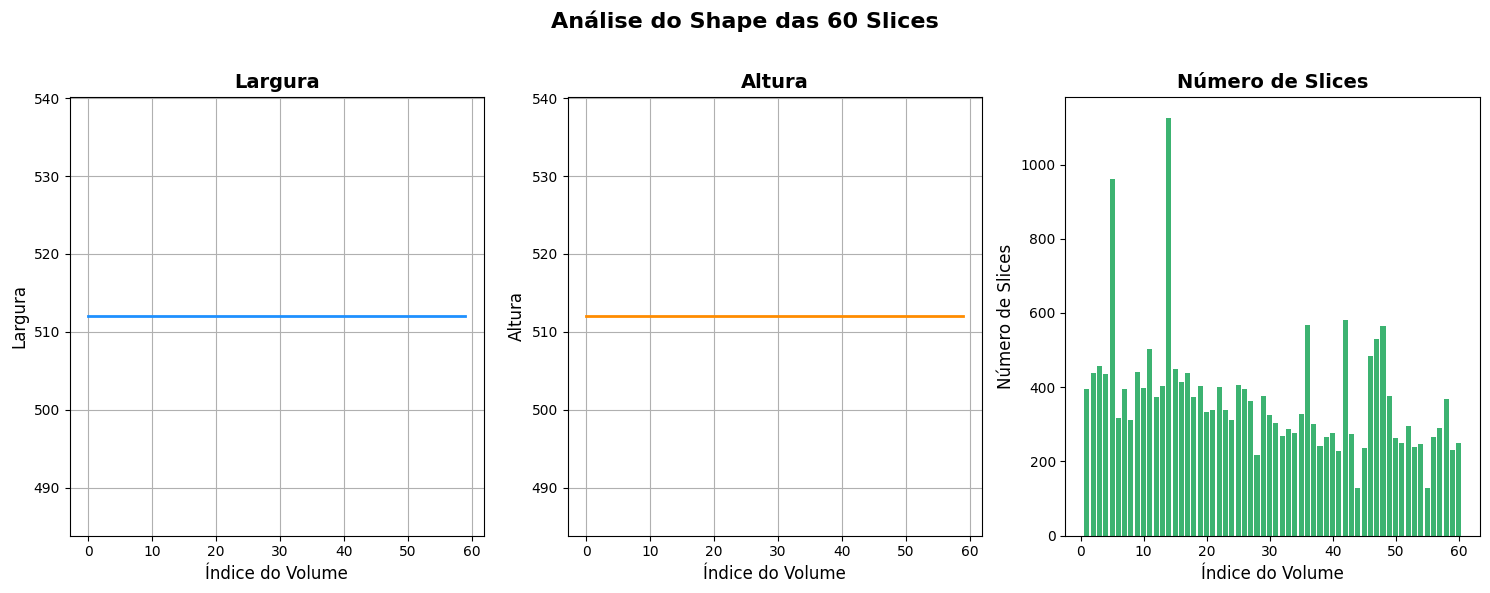

In [ ]:
import matplotlib.pyplot as plt

# Criação da figura com tamanho adequado
fig = plt.figure(figsize=(15, 6))

# Subplot 1: Largura
plt.subplot(131)
plt.plot(shapes_np[:, 0], color='dodgerblue', lw=2)
plt.title('Largura', fontsize=14, fontweight='bold')
plt.xlabel('Índice do Volume', fontsize=12)
plt.ylabel('Largura', fontsize=12)
plt.grid(True)

# Subplot 2: Altura
plt.subplot(132)
plt.plot(shapes_np[:, 1], color='darkorange', lw=2)
plt.title('Altura', fontsize=14, fontweight='bold')
plt.xlabel('Índice do Volume', fontsize=12)
plt.ylabel('Altura', fontsize=12)
plt.grid(True)

# Subplot 3: Número de Slices
plt.subplot(133)
plt.bar(range(1, 61), shapes_np[:, 2], color='mediumseagreen')
plt.title('Número de Slices', fontsize=14, fontweight='bold')
plt.xlabel('Índice do Volume', fontsize=12)
plt.ylabel('Número de Slices', fontsize=12)

# Ajuste de layout e título geral
plt.suptitle('Análise do Shape das 60 Slices', fontsize=16, fontweight='bold')

# Ajustando a disposição dos gráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajuste para não sobrepor o título

# Salvando o gráfico com o nome desejado
# plt.savefig('analise_shape_slices_tcc.png', dpi=300)

# Exibir o gráfico
plt.show()

In [25]:
print('Quantidade mínima de slices: ', shapes_np.min())
print('Quantidade máxima de slices: ', shapes_np.max())

print('Quantidade de slices: ', shapes_np.sum(axis=0)[-1])

Quantidade mínima de slices:  128
Quantidade máxima de slices:  1126
Quantidade de slices:  22183


In [20]:
# Range de valores
min_max = []
for vol, _ in generator:
    for slice in np.transpose(vol, (2,0,1)):
        min_max.append((slice.min(), slice.max()))

In [21]:
from scipy import stats

print(f"Menor valor de intensidade: {min([i[0] for i in min_max])}")
print(f"Maior valor de intensidade: {max([i[1] for i in min_max])}")

print(f"Moda dos valores mínimos:\n\t{stats.mode([i[0] for i in min_max])}")
print(f"Moda dos valores máximos:\n\t{stats.mode([i[1] for i in min_max])}")

Menor valor de intensidade: -31960.0
Maior valor de intensidade: 31696.0
Moda dos valores mínimos:
	ModeResult(mode=np.float64(-1024.0), count=np.int64(10536))
Moda dos valores máximos:
	ModeResult(mode=np.float64(3071.0), count=np.int64(1779))


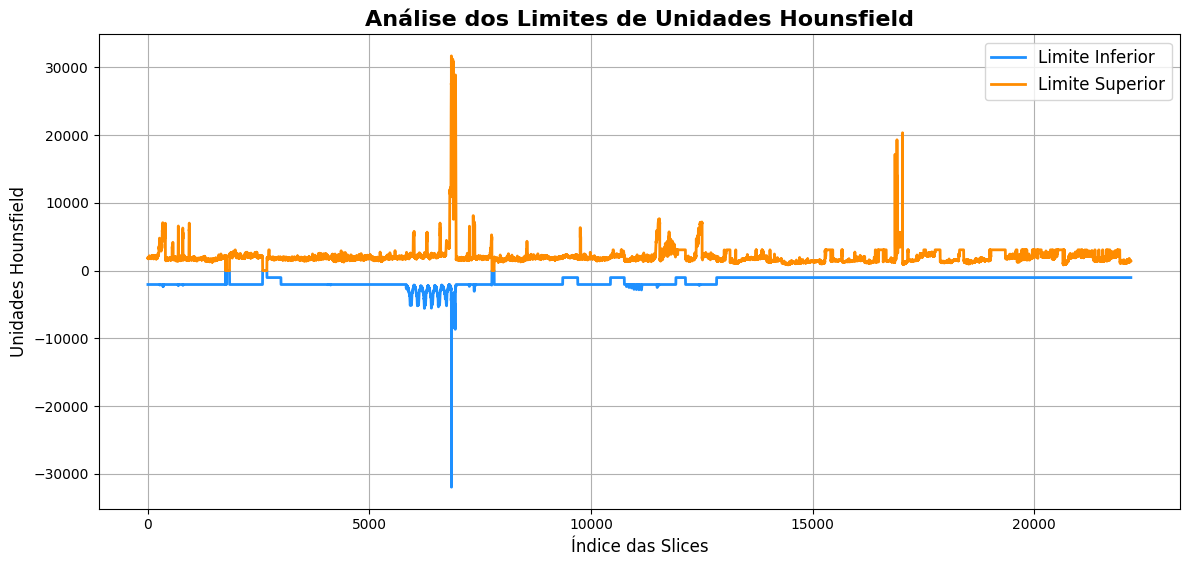

In [27]:
# Criação da figura com tamanho adequado
fig = plt.figure(figsize=(12, 6))

# Plotando os limites de unidades Hounsfield
plt.plot([i[0] for i in min_max], color='dodgerblue', lw=2, label='Limite Inferior')
plt.plot([i[1] for i in min_max], color='darkorange', lw=2, label='Limite Superior')

# Títulos e rótulos
plt.title('Análise dos Limites de Unidades Hounsfield', fontsize=16, fontweight='bold')
plt.xlabel('Índice das Slices', fontsize=12)
plt.ylabel('Unidades Hounsfield', fontsize=12)

# Adicionando legenda
plt.legend(fontsize=12)

# Adicionando grid para facilitar a visualização
plt.grid(True)

# Ajustando o layout para garantir que o título não sobreponha os gráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Salvando o gráfico com o nome desejado
plt.savefig('analise_limites_hounsfield_tcc.png', dpi=300)

# Exibindo o gráfico
plt.show()

### Análise para pré-processamento

In [ ]:
import cv2


def pre_processar(ct_slice: np.array):
    # Windowing
    new_slice = np.clip(ct_slice, -1000, 650)
    new_slice = (new_slice + 1000) / 1650
    new_slice = (new_slice*255).astype(np.uint8)

    # ...

    return new_slice



def visualize_preprocessing(num_lins, volumes):
    assert num_lins % 2 == 0
	
    fig, axs = plt.subplots(num_lins, 6, figsize=(30, 75), dpi=200)
    # image, windowing, clahe, ...

    for i, lin in enumerate(axs):
        file_idx = random.randint(0, 59)
        volume_path = volumes[file_idx]

        volume, _ = load_nifti(volume_path)

        # exibir slice
        slice_idx = random.randint(0, volume.shape[-1]-1)
        slice = volume[:, :, slice_idx]

        lin[0].imshow(slice, cmap='gray')
        lin[0].set_title('Original', fontsize=19)

        # exibir windowing
        new_slice = np.clip(slice, -1000, 650)
        new_slice = (new_slice + 1000) / 1650
        new_slice = (new_slice*255).astype(np.uint8)
        lin[1].imshow(new_slice, cmap='gray')
        lin[1].set_title('Windowing (W)', fontsize=19)

        # exibir clahe
        clahe = cv2.createCLAHE(clipLimit=1)
        clahe_img = np.clip(clahe.apply(new_slice), 0, 255).astype(np.uint8)
        _, threshold_img = cv2.threshold(new_slice, 155, 255, cv2.THRESH_BINARY)

        lin[2].imshow(clahe_img, cmap='gray')
        lin[2].set_title('W+clahe cliplimit=1', fontsize=19)

        # exibir filtro da mediana + clahe1
        median = cv2.medianBlur(clahe_img,3)
        lin[5].imshow(median, cmap='gray')
        lin[5].set_title('W+clahe cliplimit=1+\nmediana com kernel 3x3', fontsize=19)




        # exibir clahe
        clahe = cv2.createCLAHE(clipLimit=2)
        clahe_img = np.clip(clahe.apply(new_slice), 0, 255).astype(np.uint8)
        _, threshold_img = cv2.threshold(new_slice, 155, 255, cv2.THRESH_BINARY)

        lin[3].imshow(clahe_img, cmap='gray')
        lin[3].set_title('W+clahe cliplimit=2', fontsize=19)


        # exibir clahe
        clahe = cv2.createCLAHE(clipLimit=3)
        clahe_img = np.clip(clahe.apply(new_slice), 0, 255).astype(np.uint8)
        _, threshold_img = cv2.threshold(new_slice, 155, 255, cv2.THRESH_BINARY)
        

        lin[4].imshow(clahe_img, cmap='gray')
        lin[4].set_title('W+clahe cliplimit=3', fontsize=19)


        for col in lin:
            col.axis('off')

        
        # lin[0].set_title(volume_path.parent.name+'/'+volume_path.name, fontsize=9, loc='left')

    plt.tight_layout(w_pad=0.2, h_pad=0.2)
    plt.show()

# title=sample_file.parent.name + '/' + sample_file.name
visualize_preprocessing(20, volumes)  #TODO: salvar imagem ao inves de exibir